In [38]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from IPython.display import display, Markdown, Latex

In [39]:
# Original Data
temperature_K = np.array([288.15, 289.15, 290.15, 291.15, 292.15, 293.15, 294.15, 295.15, 296.15,
                          297.15, 298.15, 299.15, 300.15, 301.15, 302.15, 303.15, 304.15, 305.15,
                          306.15, 307.15, 308.15, 309.15, 310.15, 311.15, 312.15, 313.15, 314.15,
                          315.15, 316.15, 317.15, 318.15])
leak_rate_mol_per_s = np.array([4.009e-12, 4.178e-12, 4.354e-12, 4.536e-12, 4.725e-12, 4.920e-12,
                                5.121e-12, 5.330e-12, 5.546e-12, 5.768e-12, 5.999e-12, 6.236e-12,
                                6.482e-12, 6.736e-12, 6.998e-12, 7.268e-12, 7.547e-12, 7.835e-12,
                                8.132e-12, 8.439e-12, 8.754e-12, 9.080e-12, 9.415e-12, 9.761e-12,
                                1.012e-11, 1.048e-11, 1.086e-11, 1.125e-11, 1.165e-11, 1.206e-11,
                                1.249e-11])

In [40]:
temperature_K

array([288.15, 289.15, 290.15, 291.15, 292.15, 293.15, 294.15, 295.15,
       296.15, 297.15, 298.15, 299.15, 300.15, 301.15, 302.15, 303.15,
       304.15, 305.15, 306.15, 307.15, 308.15, 309.15, 310.15, 311.15,
       312.15, 313.15, 314.15, 315.15, 316.15, 317.15, 318.15])

In [41]:
leak_rate_mol_per_s

array([4.009e-12, 4.178e-12, 4.354e-12, 4.536e-12, 4.725e-12, 4.920e-12,
       5.121e-12, 5.330e-12, 5.546e-12, 5.768e-12, 5.999e-12, 6.236e-12,
       6.482e-12, 6.736e-12, 6.998e-12, 7.268e-12, 7.547e-12, 7.835e-12,
       8.132e-12, 8.439e-12, 8.754e-12, 9.080e-12, 9.415e-12, 9.761e-12,
       1.012e-11, 1.048e-11, 1.086e-11, 1.125e-11, 1.165e-11, 1.206e-11,
       1.249e-11])

In [42]:
# Transformations
x = 1 / temperature_K
y = np.log(leak_rate_mol_per_s / temperature_K)

In [43]:
x
# In order to transform the equation

array([0.00347041, 0.00345841, 0.00344649, 0.00343466, 0.0034229 ,
       0.00341122, 0.00339963, 0.00338811, 0.00337667, 0.0033653 ,
       0.00335402, 0.0033428 , 0.00333167, 0.0033206 , 0.00330961,
       0.0032987 , 0.00328785, 0.00327708, 0.00326637, 0.00325574,
       0.00324517, 0.00323468, 0.00322425, 0.00321388, 0.00320359,
       0.00319336, 0.00318319, 0.00317309, 0.00316306, 0.00315308,
       0.00314317])

In [32]:
y

array([-31.90596046, -31.86813404, -31.83032418, -31.79281415,
       -31.75542092, -31.71839701, -31.68176122, -31.64515358,
       -31.60881025, -31.57293278, -31.53702504, -31.50162728,
       -31.46627436, -31.43116332, -31.3963203 , -31.3617677 ,
       -31.32739198, -31.2932237 , -31.2592894 , -31.22549353,
       -31.19209705, -31.15877352, -31.12577301, -31.09290137,
       -31.05999129, -31.02823475, -30.99580538, -30.9637017 ,
       -30.93193172, -30.90050177, -30.86861576])

We have the Arrehnius equation L=A⋅Te −B/T\, with the transformation:
Ln(L)=Ln(A)+Ln(T)-B/T
Ln(L/T)=Ln(A)-B/T

In [50]:
# Linear fit constant
X = sm.add_constant(x)

In [34]:
X

array([[1.        , 0.00347041],
       [1.        , 0.00345841],
       [1.        , 0.00344649],
       [1.        , 0.00343466],
       [1.        , 0.0034229 ],
       [1.        , 0.00341122],
       [1.        , 0.00339963],
       [1.        , 0.00338811],
       [1.        , 0.00337667],
       [1.        , 0.0033653 ],
       [1.        , 0.00335402],
       [1.        , 0.0033428 ],
       [1.        , 0.00333167],
       [1.        , 0.0033206 ],
       [1.        , 0.00330961],
       [1.        , 0.0032987 ],
       [1.        , 0.00328785],
       [1.        , 0.00327708],
       [1.        , 0.00326637],
       [1.        , 0.00325574],
       [1.        , 0.00324517],
       [1.        , 0.00323468],
       [1.        , 0.00322425],
       [1.        , 0.00321388],
       [1.        , 0.00320359],
       [1.        , 0.00319336],
       [1.        , 0.00318319],
       [1.        , 0.00317309],
       [1.        , 0.00316306],
       [1.        , 0.00315308],
       [1.

In [51]:
# Linear Fit
model = sm.OLS(y, X).fit()
results = model.summary()

In [47]:
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.821e+08
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          3.95e-100
Time:                        02:00:14   Log-Likelihood:                 235.03
No. Observations:                  31   AIC:                            -466.1
Df Residuals:                      29   BIC:                            -463.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.9063      0.001  -2.69e+04      0.000     -20.908     -20.905
x1         -3169.5879      0.235  -1.35e+04      0.000   -3170.068   -3169.108
==============================================================================
Omnibus:                        4.715   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                3.978
Skew:                          -0.301   Prob(JB):                        0.137
Kurtosis:                       4.648   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Coefficients
ln_A = model.params[0]
B = -model.params[1]
A = np.exp(ln_A)
ln_A, B, A, results

(-20.90626476031224,
 3169.5878716123552,
 8.327690523242267e-10,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 1.821e+08
 Date:                Tue, 13 Aug 2024   Prob (F-statistic):          3.95e-100
 Time:                        02:02:06   Log-Likelihood:                 235.03
 No. Observations:                  31   AIC:                            -466.1
 Df Residuals:                      29   BIC:                            -463.2
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---

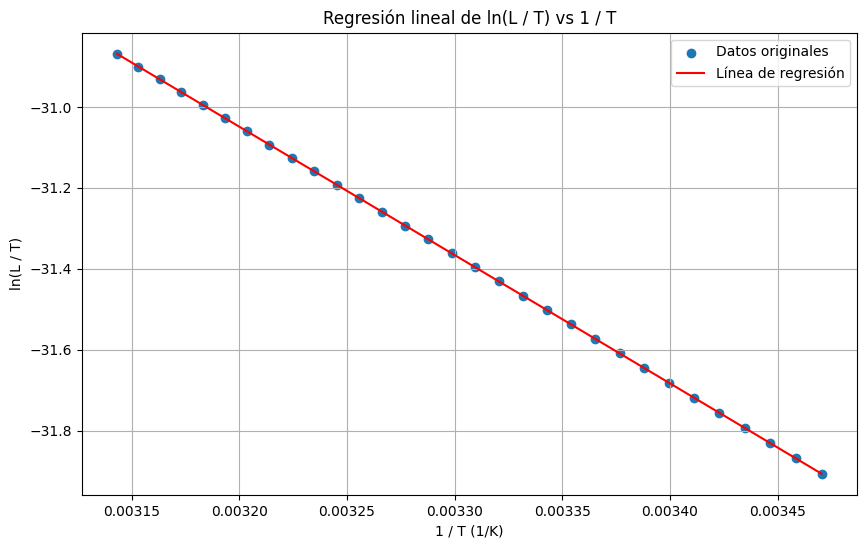

In [53]:
import matplotlib.pyplot as plt
# Calcular los valores ajustados
y_fit = model.predict(X)

# Graficar los datos y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Datos originales')
plt.plot(x, y_fit, color='red', label='Línea de regresión')
plt.xlabel('1 / T (1/K)')
plt.ylabel('ln(L / T)')
plt.title('Regresión lineal de ln(L / T) vs 1 / T')
plt.legend()
plt.grid(True)
plt.show()

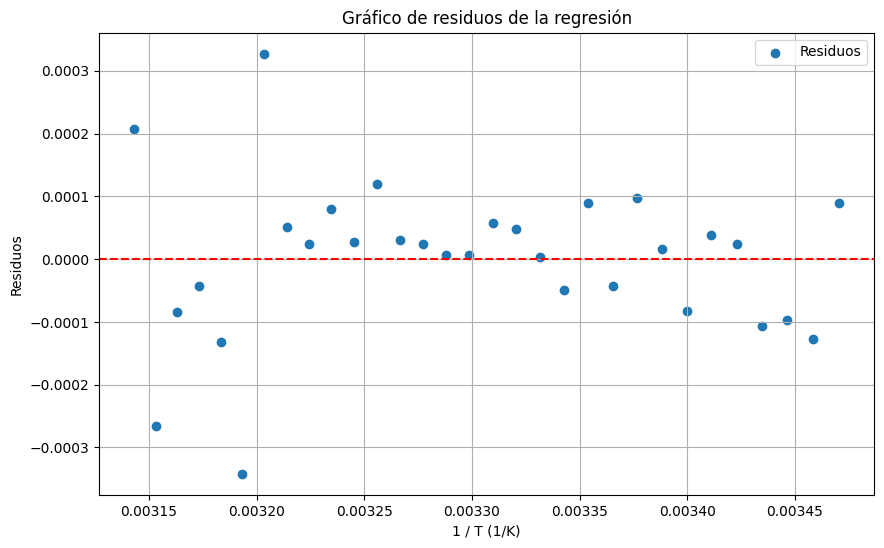

In [54]:
# Calcular los residuos
residuos = y - y_fit

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(x, residuos, label='Residuos')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('1 / T (1/K)')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos de la regresión')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
#Coefficients Calculation

ln_A = model.params[0]
B = -model.params[1]
A = np.exp(ln_A)

# Mostrar resultados
print(f"ln(A) = {ln_A}")
print(f"B = {B}")
print(f"A = {A}")

ln(A) = -20.90626476031224
B = 3169.5878716123552
A = 8.327690523242267e-10
